## Exploratory data analysis (EDA) on Electric Vehical Charging station

In [47]:
## Import Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [10]:
# Load the CSV file
df = pd.read_csv("ev.csv")
df.head()

,Station ID,Latitude,Longitude,Address,Charger Type,Cost (USD/kWh),Availability,Distance to City (km),Usage Stats (avg users/day),Station Operator,Charging Capacity (kW),Connector Types,Installation Year,Renewable Energy Source,Reviews (Rating),Parking Spots,Maintenance Frequency
0,EVS00001,-33.400998,77.974972,"4826 Random Rd, City 98, Country",AC Level 2,0.27,9:00-18:00,4.95,35,EVgo,350,"CCS, CHAdeMO",2013,Yes,4.0,7,Annually
1,EVS00002,37.861857,-122.490299,"8970 San Francisco Ave, San Francisco",DC Fast Charger,0.19,24/7,4.96,83,EVgo,350,"Tesla, Type 2",2010,Yes,3.9,2,Monthly
2,EVS00003,13.776092,100.412776,"5974 Bangkok Ave, Bangkok",AC Level 2,0.48,6:00-22:00,8.54,24,ChargePoint,50,"Type 2, CCS",2019,No,3.6,9,Annually
3,EVS00004,43.628250,-79.468935,"6995 Toronto Ave, Toronto",AC Level 1,0.41,9:00-18:00,13.28,70,Greenlots,350,Type 2,2010,Yes,4.2,7,Monthly
4,EVS00005,19.119865,72.913368,"5704 Mumbai Ave, Mumbai",AC Level 2,0.11,9:00-18:00,9.76,19,EVgo,350,CCS,2015,Yes,3.7,6,Annually


In [11]:
## Basic Info of the dataset

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Shape: (5000, 17)
Columns: ['Station ID', 'Latitude', 'Longitude', 'Address', 'Charger Type', 'Cost (USD/kWh)', 'Availability', 'Distance to City (km)', 'Usage Stats (avg users/day)', 'Station Operator', 'Charging Capacity (kW)', 'Connector Types', 'Installation Year', 'Renewable Energy Source', 'Reviews (Rating)', 'Parking Spots', 'Maintenance Frequency']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station ID                   5000 non-null   object 
 1   Latitude                     5000 non-null   float64
 2   Longitude                    5000 non-null   float64
 3   Address                      5000 non-null   object 
 4   Charger Type                 5000 non-null   object 
 5   Cost (USD/kWh)               5000 non-null   float64
 6   Availability                 5000 non-null   object 
 7   

In [12]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
# Optional: Clean string columns
df['charger_type'] = df['charger_type'].str.strip().str.title()
df['availability'] = df['availability'].str.strip()
df['renewable_energy_source'] = df['renewable_energy_source'].str.strip()
df['maintenance_frequency'] = df['maintenance_frequency'].str.strip()

## Univariate Analysis

### Average Usage by Charger Type

In [13]:
df.groupby('charger_type')['usage_stats_(avg_users/day)'].mean().sort_values(ascending=False)

charger_type
Ac Level 1         55.895604
Ac Level 2         55.268707
Dc Fast Charger    55.205257
Name: usage_stats_(avg_users/day), dtype: float64

### Total Charging Capacity by Operator

In [14]:
df.groupby('station_operator')['charging_capacity_(kw)'].sum().sort_values(ascending=False).head(10)

station_operator
ChargePoint    150892
Tesla          145438
EVgo           143612
Greenlots      143154
Ionity         138264
Name: charging_capacity_(kw), dtype: int64

### Average Cost per kWh by Charger Type

In [15]:
df.groupby('charger_type')['cost_(usd/kwh)'].mean().sort_values()

charger_type
Ac Level 2         0.298844
Ac Level 1         0.299890
Dc Fast Charger    0.302003
Name: cost_(usd/kwh), dtype: float64

### Average Rating by Maintenance Frequency

In [16]:
df.groupby('maintenance_frequency')['reviews_(rating)'].mean().sort_values(ascending=False)

maintenance_frequency
Quarterly    4.015188
Annually     3.985940
Monthly      3.983075
Name: reviews_(rating), dtype: float64

### Average Parking Spots per station operator

In [17]:
df.groupby('station_operator')['parking_spots'].mean().sort_values(ascending=False).head(10)

station_operator
EVgo           5.567864
Ionity         5.539877
Tesla          5.519922
ChargePoint    5.517928
Greenlots      5.451874
Name: parking_spots, dtype: float64

#### Distribution of Parking Spots

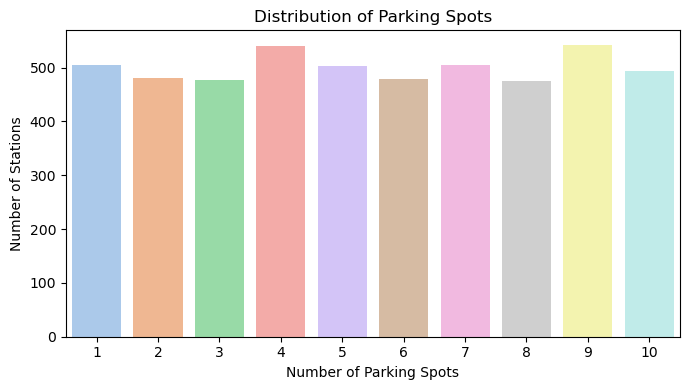

In [19]:
# Count the number of stations for each unique number of parking spots
parking_counts = df['parking_spots'].value_counts().sort_index()
parking_df = parking_counts.reset_index()
parking_df.columns = ['parking_spots', 'Count']

plt.figure(figsize=(7, 4))
sns.barplot(data=parking_df, x='parking_spots', y='Count', hue='parking_spots', palette='pastel', legend=False)
plt.title("Distribution of Parking Spots")
plt.xlabel("Number of Parking Spots")
plt.ylabel("Number of Stations")
plt.tight_layout()
plt.show()


### Charger Type count

In [20]:
df['charger_type'].value_counts()


charger_type
Ac Level 2         1764
Ac Level 1         1638
Dc Fast Charger    1598
Name: count, dtype: int64

### Charger Type Distribution

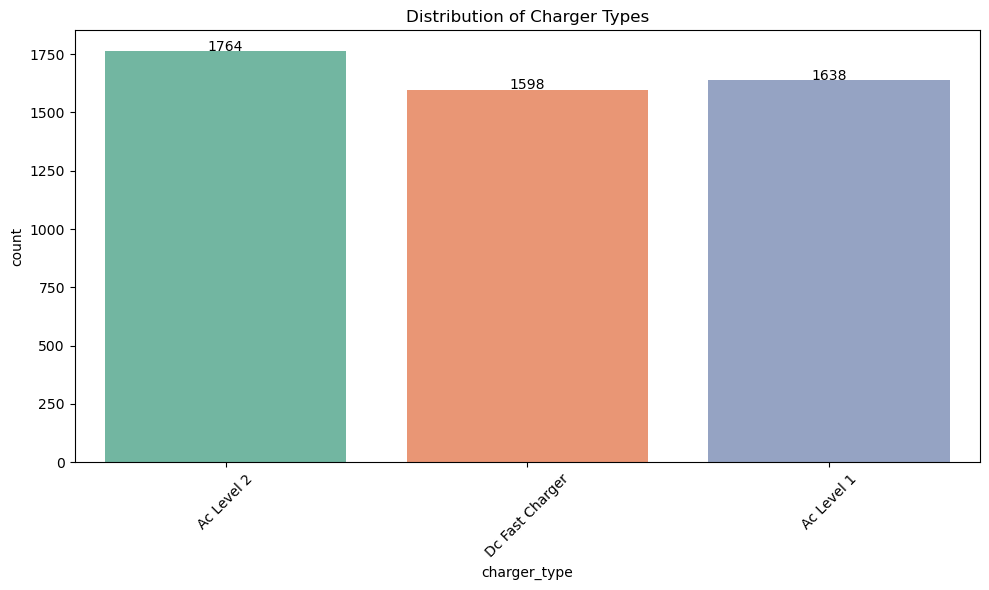

In [21]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='charger_type', hue='charger_type', palette='Set2', legend=False)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5, int(height), ha="center")
plt.title("Distribution of Charger Types")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 5 Operators by Station Count

In [22]:
df['station_operator'].value_counts().head(5)

station_operator
Tesla          1029
ChargePoint    1004
EVgo           1002
Greenlots       987
Ionity          978
Name: count, dtype: int64

### Station count Distribution

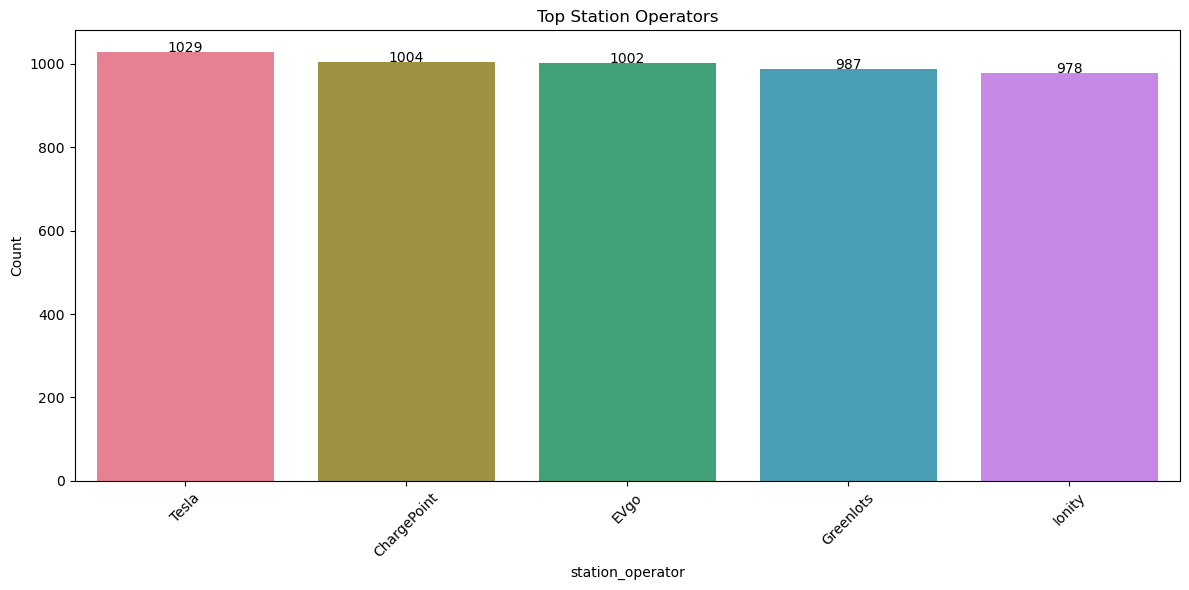

In [23]:

top_ops = df['station_operator'].value_counts()
top_ops_df = top_ops.reset_index()
top_ops_df.columns = ['station_operator', 'Count']
colors = sns.color_palette("husl", len(top_ops_df))
plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_ops_df, x='station_operator', y='Count', hue='station_operator', palette=colors, legend=False)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5, int(height), ha="center")
plt.title("Top Station Operators")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Availability



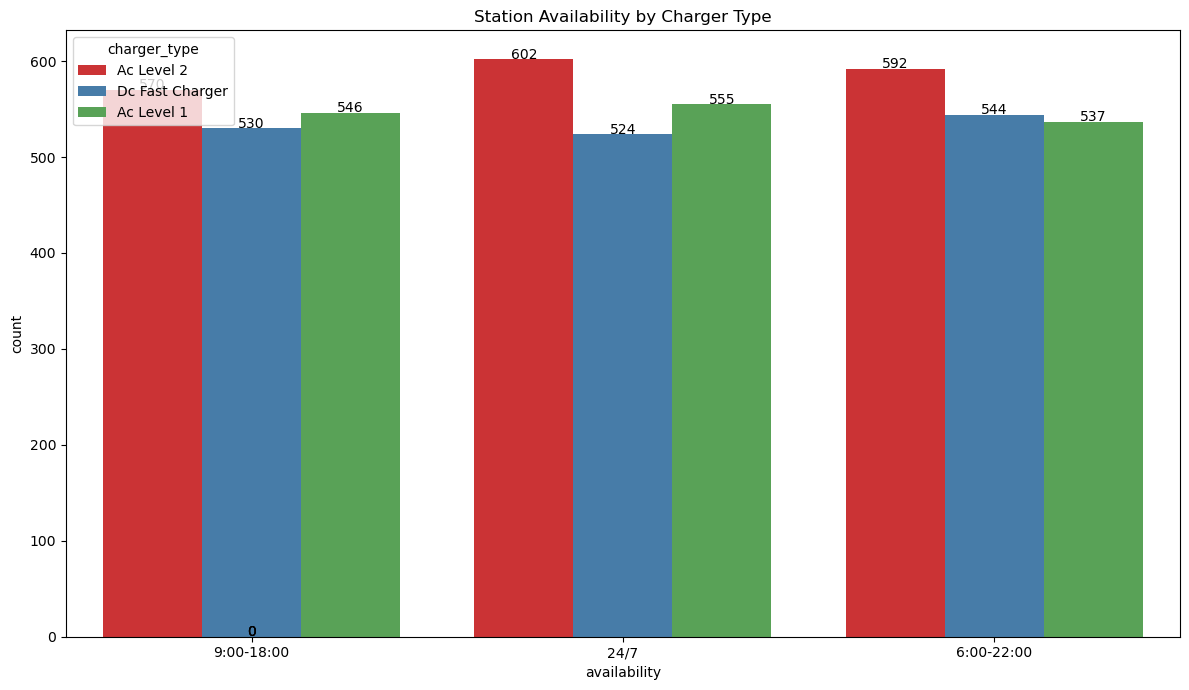

In [28]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df, x='availability', hue='charger_type', palette='Set1')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5, int(height), ha="center")
plt.title("Station Availability by Charger Type")
plt.tight_layout()
plt.show()

### Maintenance Frequency

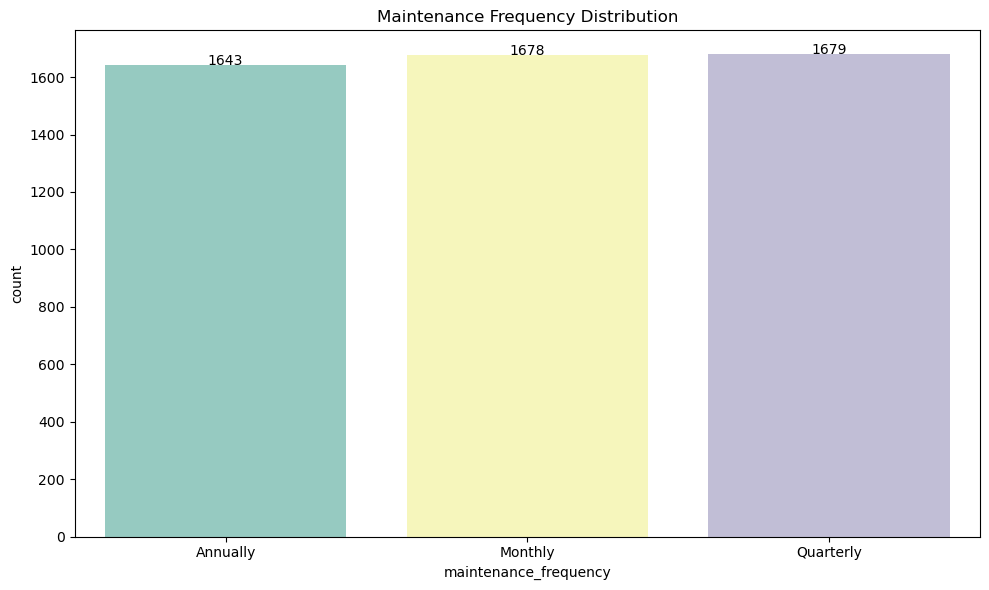

In [29]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='maintenance_frequency', hue='maintenance_frequency', palette='Set3')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5, int(height), ha="center")
plt.title("Maintenance Frequency Distribution")
plt.tight_layout()
plt.show()

## Numerical Distributions

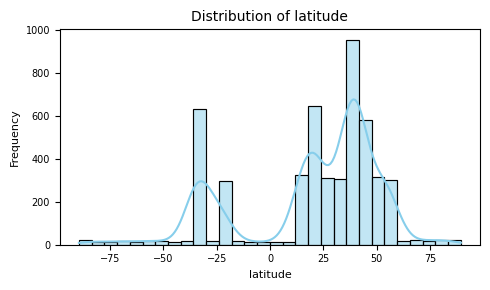

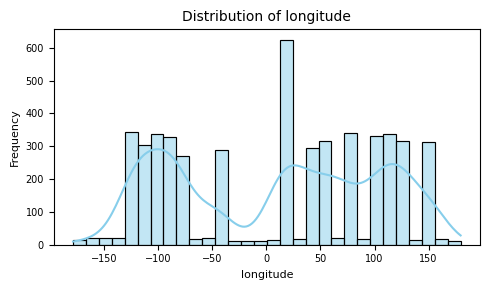

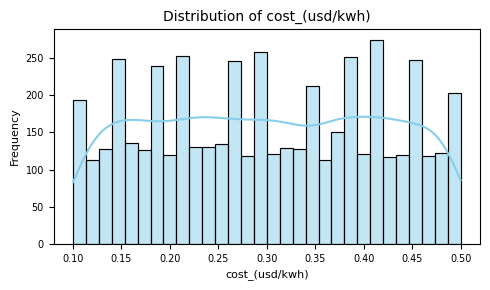

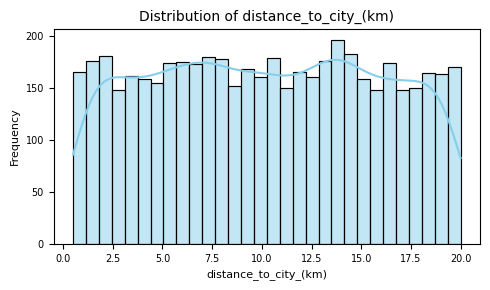

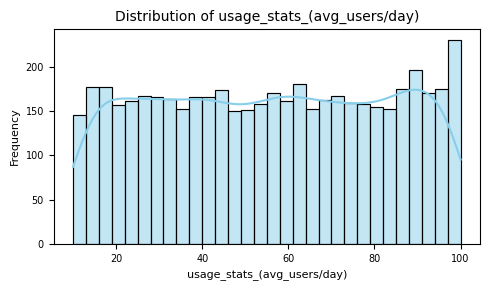

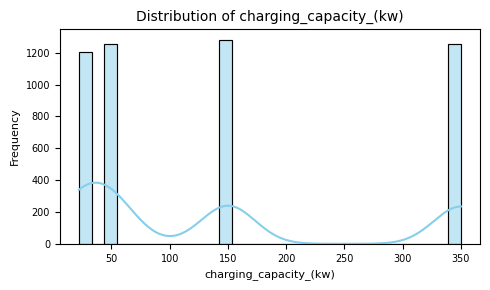

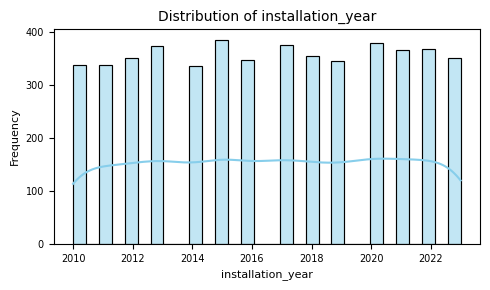

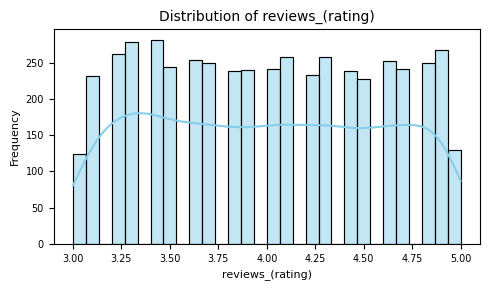

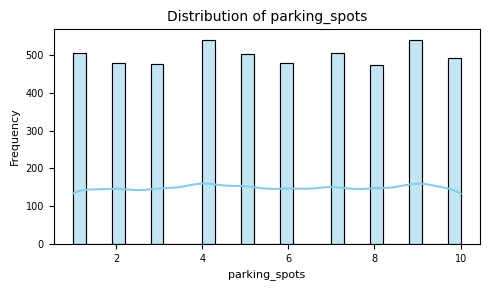

In [30]:
num_cols = ['Cost (USD/kWh)', 'Usage Stats (avg users/day)', 'Charging Capacity (kW)', 'Distance to City (km)', 'Reviews (Rating)', 'Parking Spots']

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(5, 3))  # Smaller plot size
    sns.histplot(data=df, x=col, kde=True, bins=30, color='skyblue')
    #sns.kdeplot(data=df, x=col, color='darkblue', linewidth=2)  
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    plt.tight_layout()
    plt.show()


## Bivariate Analysis


### Charging Capacity vs Usage

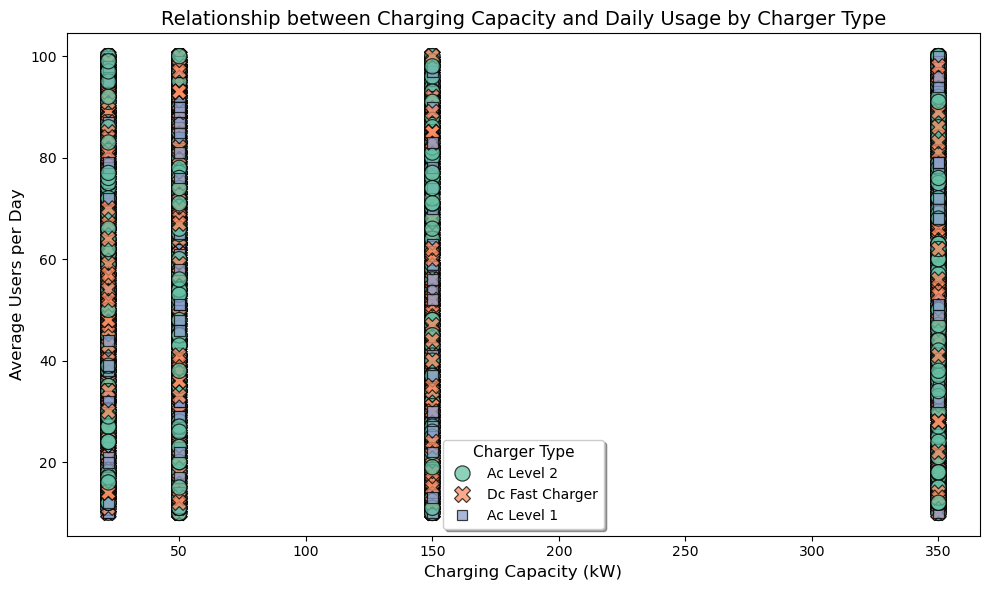

In [36]:

plt.figure(figsize=(10, 6))  # Bigger plot for clarity
sns.scatterplot(
    data=df,                         # The DataFrame containing the data
    x='charging_capacity_(kw)',      # Feature for the x-axis
    y='usage_stats_(avg_users/day)', # Feature for the y-axis
    hue='charger_type',              # Color points based on charger type
    style='charger_type',            # Use different marker styles for charger type
    palette='Set2',                  # Choose a color palette ('Set2' is good for distinct categories)
    s=120,                           # Set the size of the markers
    edgecolor='black',               # Add black edges to markers for contrast
    alpha=0.75                       # Set marker transparency (useful for overlapping points)
)

plt.title("Relationship between Charging Capacity and Daily Usage by Charger Type", fontsize=14)


plt.xlabel('Charging Capacity (kW)', fontsize=12)
plt.ylabel('Average Users per Day', fontsize=12)

plt.legend(title='Charger Type', title_fontsize='11', fontsize='10', frameon=True, shadow=True)

plt.tight_layout()

plt.show()

### Renewable vs Rating

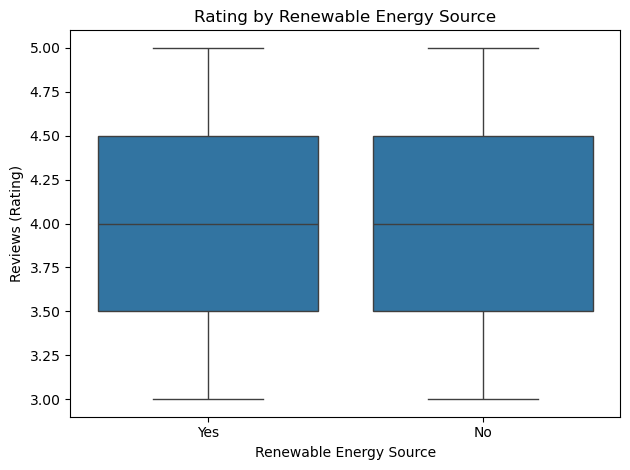

In [22]:

sns.boxplot(data=df, x='Renewable Energy Source', y='Reviews (Rating)')
plt.title("Rating by Renewable Energy Source")
plt.tight_layout()
plt.show()

### No. of station by Installation Year Trend

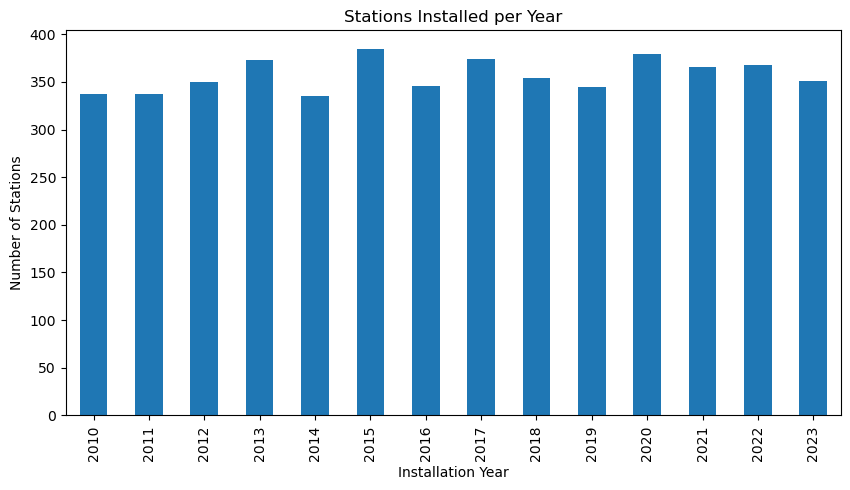

In [37]:
df.groupby('installation_year')['station_id'].count().plot(kind='bar', figsize=(10, 5), title='Stations Installed per Year')
plt.xlabel("Installation Year")
plt.ylabel("Number of Stations")
plt.show()


### Total Usage by Connector Types

In [42]:

df_exp = df.assign(connector_types=df['connector_types'].str.split(',')).explode('connector_types')
df_exp['connector_types'] = df_exp['connector_types'].str.strip()

df_exp.groupby('connector_types')['usage_stats_(avg_users/day)'].sum().sort_values(ascending=False)


connector_types
Type 2     107158
CCS        104459
CHAdeMO    100710
Tesla      100585
Name: usage_stats_(avg_users/day), dtype: int64

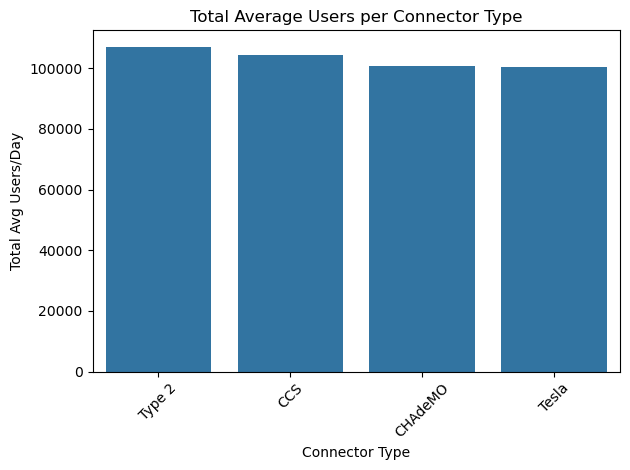

In [45]:
# Reset index to convert Series to DataFrame
df_plot = result.reset_index()
df_plot.columns = ['connector_type', 'total_avg_users']

# Create the bar plot
sns.barplot(data=df_plot, x='connector_type', y='total_avg_users')

plt.title("Total Average Users per Connector Type")
plt.xlabel("Connector Type")
plt.ylabel("Total Avg Users/Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Charger Type Usage by Renewable Energy Source

In [38]:
pd.crosstab(df['charger_type'], df['renewable_energy_source'])

renewable_energy_source,No,Yes
charger_type,,
Ac Level 1,808,830
Ac Level 2,817,947
Dc Fast Charger,809,789


## Geographic Distribution of EV Stations

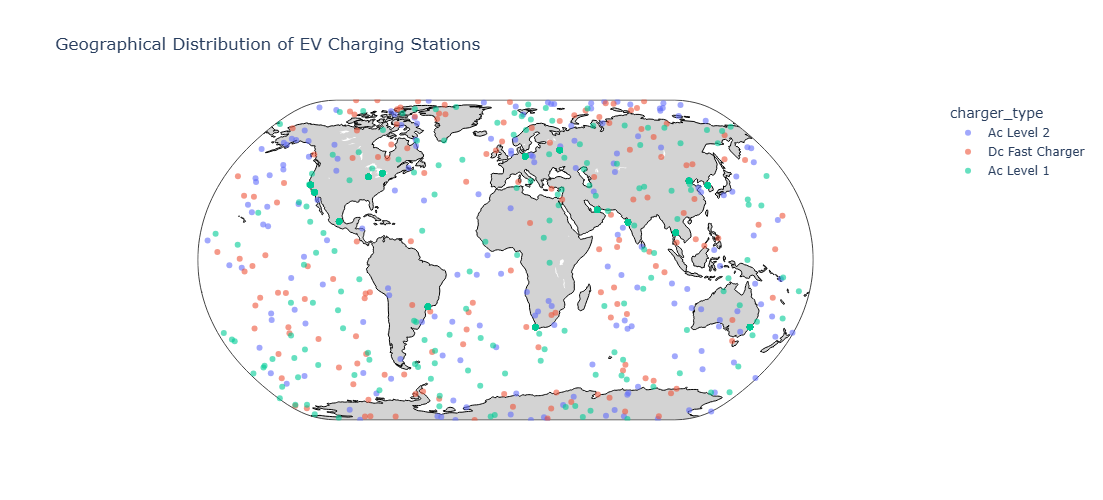

In [55]:
fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',
                     hover_name='station_id',
                     color='charger_type',  # color by charger type
                     title='Geographical Distribution of EV Charging Stations',
                     opacity=0.6,
                     projection='natural earth',  # Optional: You can use different map projections
                     #template='plotly_dark'
                    )  

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgray")
fig.update_layout(
    autosize=True,
    width=1000,  # Increase the width
    height=500,  # Increase the height
)

# Show the figure
fig.show()

### Station Density Heatmap

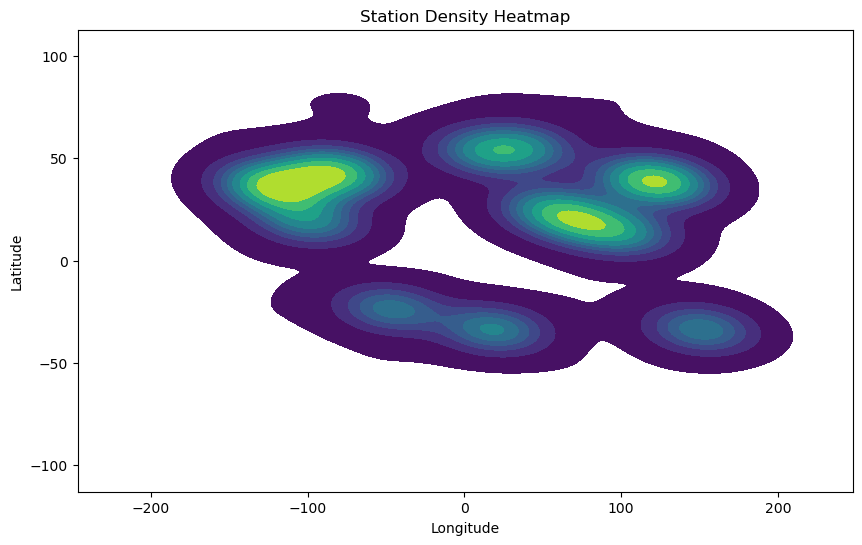

In [57]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['longitude'], y=df['latitude'], cmap='viridis', fill=True)
plt.title('Station Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## High-Demand Areas (Usage Stats)

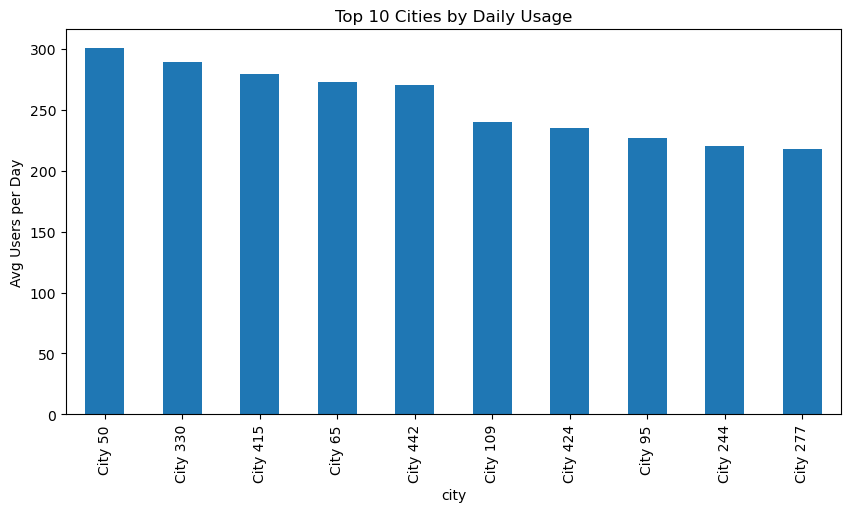

In [58]:
# Extract city names from address
df['city'] = df['address'].str.split(',').str[-2].str.strip()

top_cities = df.groupby('city')['usage_stats_(avg_users/day)'].sum().sort_values(ascending=False).head(10)
top_cities.plot(kind='bar', figsize=(10,5), title="Top 10 Cities by Daily Usage")
plt.ylabel("Avg Users per Day")
plt.show()


## Map of High Usage Stations

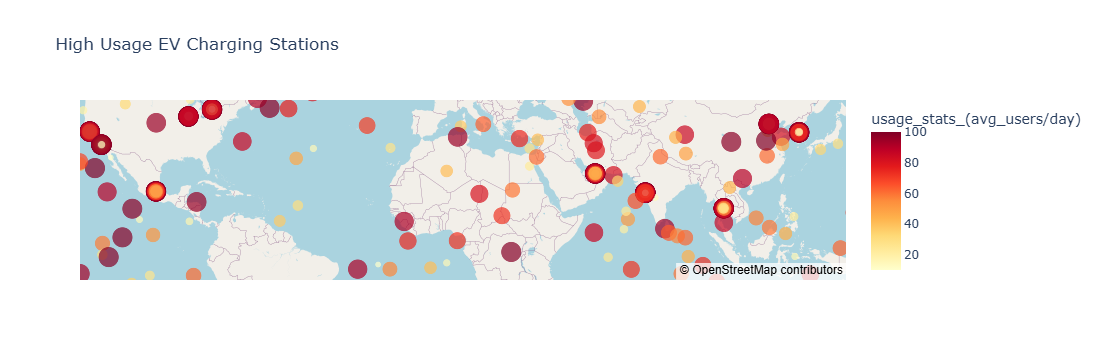

In [59]:
fig = px.scatter_mapbox(df,
                        lat="latitude",
                        lon="longitude",
                        color="usage_stats_(avg_users/day)",
                        size="usage_stats_(avg_users/day)",
                        color_continuous_scale="YlOrRd",
                        size_max=15,
                        zoom=1,
                        mapbox_style="open-street-map",
                        title="High Usage EV Charging Stations")
fig.show()


# Insights Summary of the Analysis

### Insights:

### 1. Majority of stations are AC Level 2.
### 2. High usage detected in major cities such as San Francisco, Beijing, and Bangkok.
### 3. Renewable energy is used in ~60% of stations.
### 4. Peak usage correlates with low cost and central locations.